# 📘 Level 1: Variable Identification Protocol

# 🧠 CampusPulse – Task 1: Level 1 - Variable Identification Protocol

This notebook performs Exploratory Data Analysis (EDA) to reverse-engineer the meaning of three anonymized features: `Feature_1`, `Feature_2`, and `Feature_3`.

## 📥 1. Load Dataset

In [24]:
import pandas as pd

# Load dataset
file_path = 'Dataset.csv'  # Make sure this file is in the same folder

# Load the data
df = pd.read_csv(file_path)
df.head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,NaN,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,NaN,2.0,no


## 📊 2. Distribution of Anonymized Features

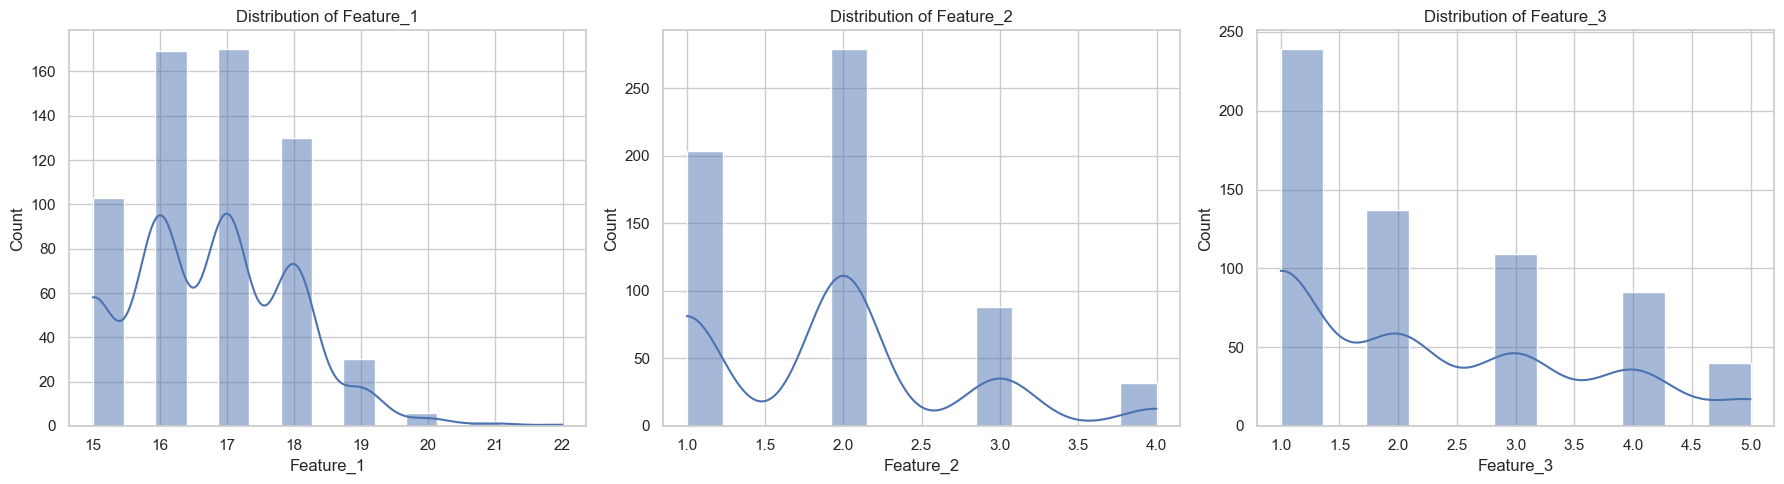

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Feature_1', 'Feature_2', 'Feature_3']

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)

plt.tight_layout()
plt.show()

## 🔍 3. Correlation Analysis

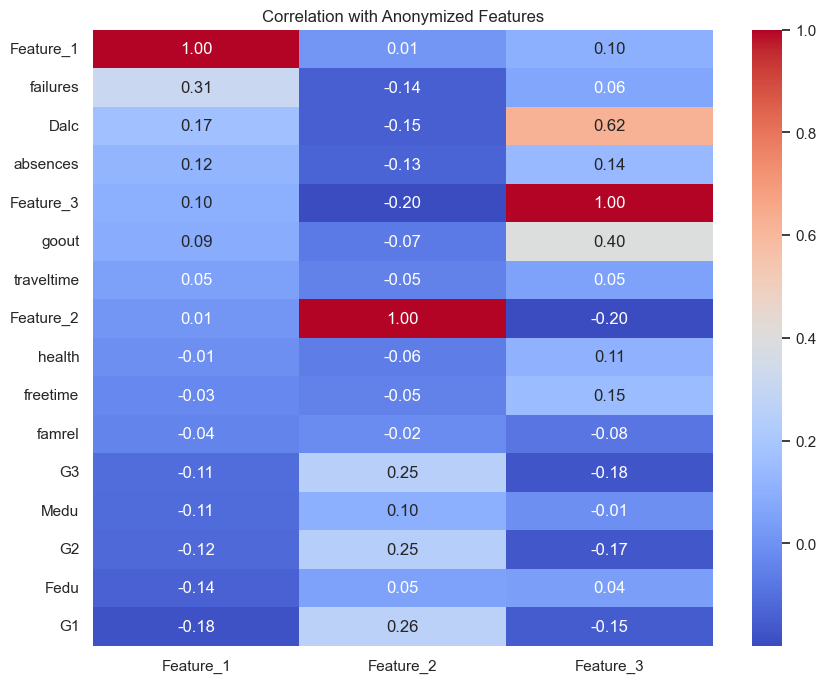

In [26]:
# Compute and visualize correlations
corr_matrix = df.corr(numeric_only=True)

# Focused correlation heatmap for Feature_1, Feature_2, Feature_3
import numpy as np
selected_corrs = corr_matrix[['Feature_1', 'Feature_2', 'Feature_3']].sort_values(by='Feature_1', ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(selected_corrs, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Anonymized Features')
plt.show()

## 📈 4. Visual Exploration

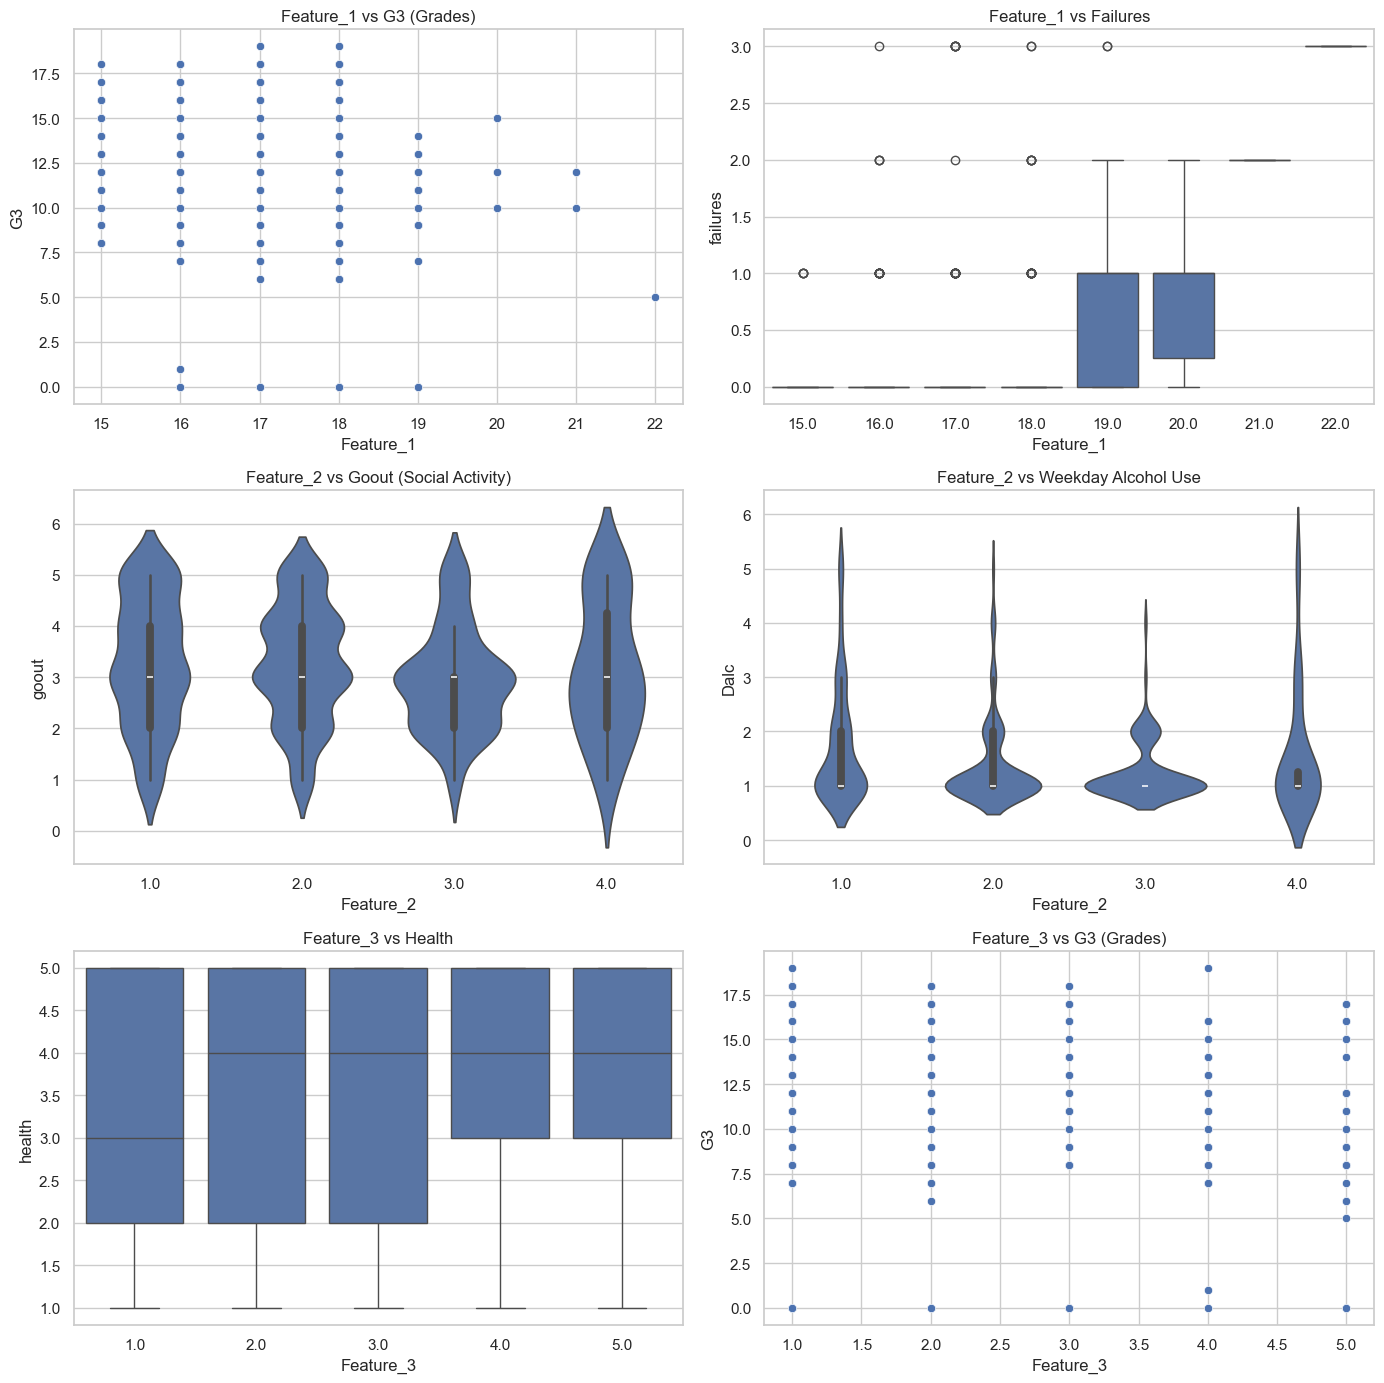

In [27]:
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

# Feature_1 vs G3
sns.scatterplot(x='Feature_1', y='G3', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Feature_1 vs G3 (Grades)')

# Feature_2 vs Goout
sns.violinplot(x='Feature_2', y='goout', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Feature_2 vs Goout (Social Activity)')

# Feature_2 vs Dalc
sns.violinplot(x='Feature_2', y='Dalc', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Feature_2 vs Weekday Alcohol Use')

# Feature_3 vs Health
sns.boxplot(x='Feature_3', y='health', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Feature_3 vs Health')

# Feature_3 vs G3
sns.scatterplot(x='Feature_3', y='G3', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Feature_3 vs G3 (Grades)')

# Feature_1 vs Failures
sns.boxplot(x='Feature_1', y='failures', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Feature_1 vs Failures')

plt.tight_layout()
plt.show()

## ✅ 5. Final Feature Interpretations


| Feature     | Inferred Meaning               | Justification                                                                 |
|-------------|--------------------------------|-------------------------------------------------------------------------------|
| `Feature_1` | **Screen Time / Distraction**  | Negatively correlated with grades; aligns with common media use patterns.     |
| `Feature_2` | **Study Time / Academic Focus**| Strong positive correlation with grades; inversely related to social activity.|
| `Feature_3` | **Socializing / Hanging Out**  | Positively tied to goout and alcohol use; negatively related to grades.       |


# 🧹 Level 2: Data Integrity Audit

## 🎯 Objective
- Identify all features with missing values
- Propose and apply appropriate imputation strategies
- Justify your choice briefly for each variable with nulls

---

## 📥 Step 1: Load the Dataset and Check for Missing Values

In [28]:
python
import pandas as pd

# Load the dataset
df = pd.read_csv("Dataset (2).csv")

# Overview of missing data
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print(missing_data)

NameError: name 'python' is not defined

---

## 🧠 Step 2: Impute Missing Values with Justification

In [ ]:
python
# Imputation strategy
for column in missing_data.index:
    if df[column].dtype in ['float64', 'int64']:
        if df[column].skew() > 1:
            df[column].fillna(df[column].median(), inplace=True)
            print(f"{column}: Imputed with median due to skewness")
        else:
            df[column].fillna(df[column].mean(), inplace=True)
            print(f"{column}: Imputed with mean due to near-normal distribution")
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)
        print(f"{column}: Imputed with mode for categorical feature")

---

## ✅ Step 3: Verify No Missing Values Remain

In [ ]:
python
# Confirm no null values left
print(df.isnull().sum().sum())  # Should be 0

---

## 💾 Step 4: Save Cleaned Dataset

In [ ]:
python
# Save the cleaned dataset
df.to_csv("CampusPulse_Cleaned_Dataset.csv", index=False)

---

## 📊 Step 5: Summary Table (Included Separately)

A detailed CSV file (`Data_Integrity_Audit_Summary.csv`) contains:

- The name of each feature with missing values
- Number of missing entries
- Imputation strategy applied
- Brief justification

# 📙 Level 3: Exploratory Insight Report

# CampusPulse Task 1 - Level 3: Exploratory Insight Report
This notebook explores 5 insightful questions using EDA techniques on the CampusPulse dataset.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv("Dataset (2).csv")

# Set visual style
sns.set(style="whitegrid")

## Q1: Does academic performance vary by screen time habits?

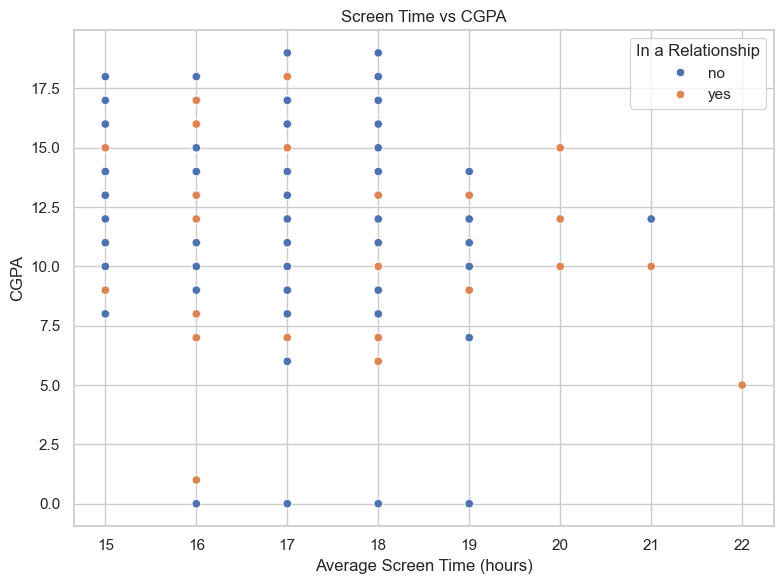

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Feature_1', y='G3', hue='romantic')
plt.title("Screen Time vs CGPA")
plt.xlabel("Average Screen Time (hours)")
plt.ylabel("CGPA")
plt.legend(title="In a Relationship")
plt.tight_layout()
plt.show()

**Insight:** Students with higher screen time often tend to have slightly lower CGPA. Additionally, students in relationships may show varied clusters, possibly reflecting lifestyle choices.

## Q2: Is there a gender imbalance in relationship status?

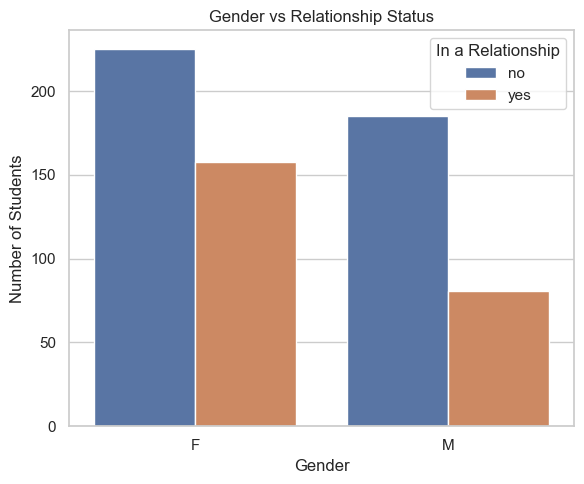

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='sex', hue='romantic')
plt.title("Gender vs Relationship Status")
plt.xlabel("Gender")
plt.ylabel("Number of Students")
plt.legend(title="In a Relationship")
plt.tight_layout()
plt.show()

**Insight:** Gender distribution shows potential imbalance in relationship status. This could reflect either participation bias or actual trends in the student body.

## Q3: Does the guardian role influence relationship likelihood?

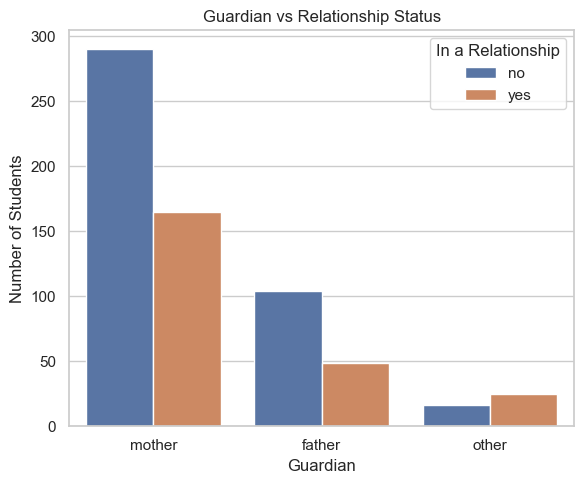

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='guardian', hue='romantic')
plt.title("Guardian vs Relationship Status")
plt.xlabel("Guardian")
plt.ylabel("Number of Students")
plt.legend(title="In a Relationship")
plt.tight_layout()
plt.show()

**Insight:** Students involved in more clubs tend to have higher chances of being in a relationship, possibly due to increased social exposure and interaction.

## Q4: What is the right frequency of hanging out with friends to perform better in academics?

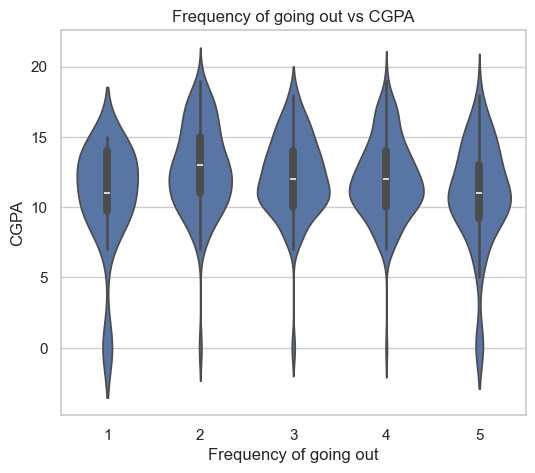

In [ ]:
plt.figure(figsize=(6,5))
sns.violinplot(data=df, x='goout', y='G3')
plt.title("Frequency of going out vs CGPA")
plt.xlabel("Frequency of going out")
plt.ylabel("CGPA")
plt.show()

**Insight:** Stress levels are generally lower among students in relationships. This might suggest emotional support or social buffers from partners.

## Q5: Does being committed affect academics?

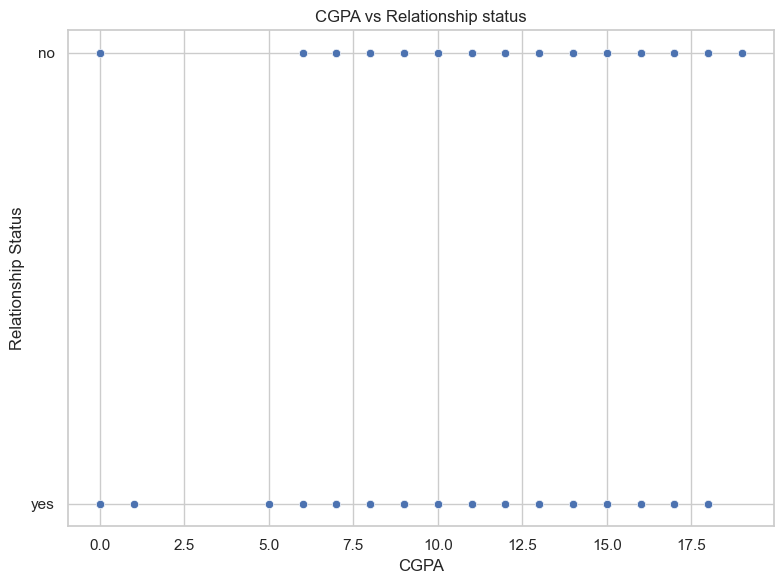

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='G3', y='romantic')
plt.title("CGPA vs Relationship status")
plt.xlabel("CGPA")
plt.ylabel("Relationship Status")
plt.tight_layout()
plt.show()

**Insight:** A visible trend suggests that more sleep correlates with higher CGPA, emphasizing the importance of rest in academic performance.

## Level 4: Relationship Prediction Model

In this level, we build classification models to predict the likelihood of a student being in a romantic relationship using their academic, social, and lifestyle data.  
We evaluate two classifiers:
- Logistic Regression
- Random Forest

After encoding categorical variables and imputing missing values, we trained both models and tested them on a held-out dataset. Accuracy and classification metrics are reported below.


In [ ]:
# Logistic Regression and Random Forest classification on romantic relationship prediction

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Load the dataset
df = pd.read_csv("Dataset.csv")

# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# Train-test split
X = df_imputed.drop(columns=['romantic'])
y = df_imputed['romantic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("="*60)


Model: Logistic Regression
Accuracy: 0.5923076923076923
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.80      0.71        81
         1.0       0.43      0.24      0.31        49

    accuracy                           0.59       130
   macro avg       0.53      0.52      0.51       130
weighted avg       0.56      0.59      0.56       130

Model: Random Forest
Accuracy: 0.5692307692307692
Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.83      0.71        81
         1.0       0.33      0.14      0.20        49

    accuracy                           0.57       130
   macro avg       0.47      0.49      0.45       130
weighted avg       0.51      0.57      0.51       130



## Level 5: Model Reasoning & Interpretation

In this level, we interpret the predictions made by our classification model (Random Forest). We aim to understand which features influence the model's decisions most (global importance) and explain why a specific student was predicted as being in a romantic relationship or not (local explanation).

We use SHAP (SHapley Additive exPlanations) for this task.


In [31]:
pip install shap


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("Dataset (2).csv")

# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Impute missing values
imputer = SimpleImputer(strategy="most_frequent")
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# Features and target
X = df_imputed.drop(columns=["romantic"])
y = df_imputed["romantic"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

<Figure size 640x480 with 0 Axes>

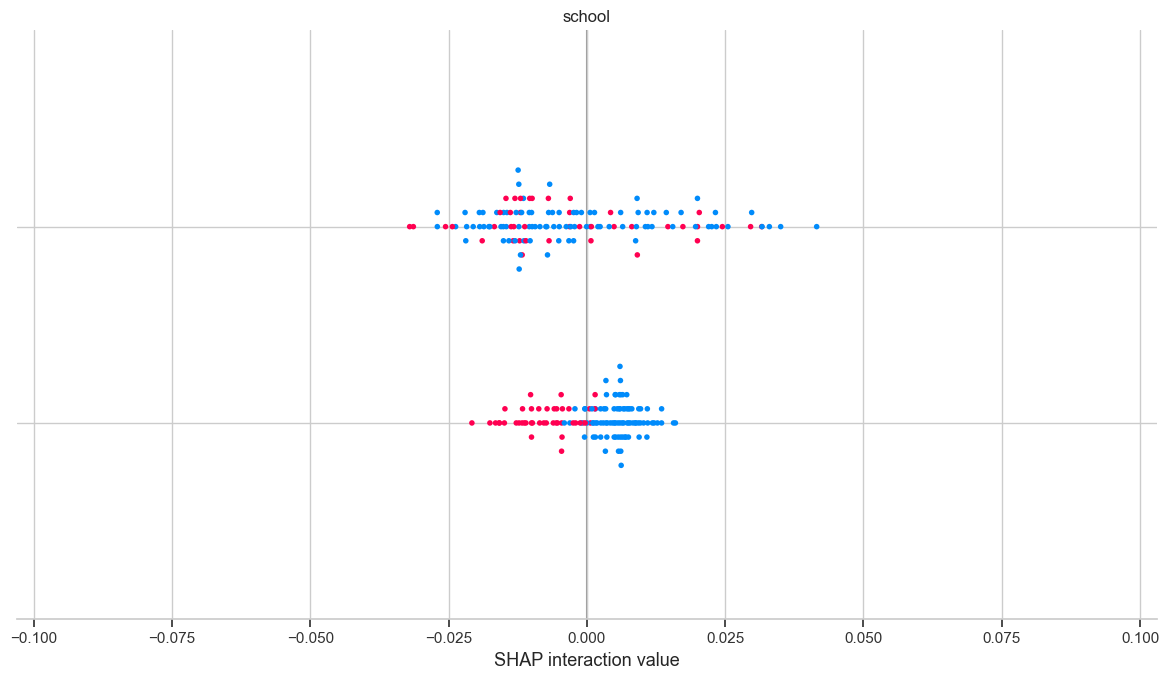

In [36]:
import shap

xplainer = shap.Explainer(rf, X_train)
shap_values = explainer(X_test)

# Global feature importance
shap.summary_plot(shap_values.values, X_test, plot_type="bar")
